In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
path = '/content/cardio_train.csv'

In [15]:
df = pd.read_csv(path, sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [16]:
#data pre processing
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [17]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

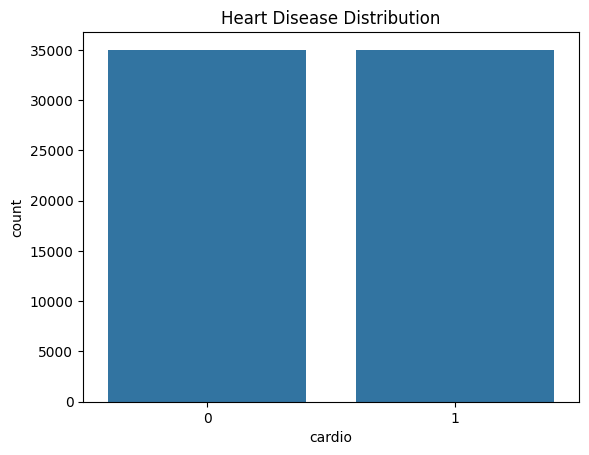

In [18]:
#data analysis
#target variable distribution
sns.countplot(x='cardio', data=df)
plt.title('Heart Disease Distribution')
plt.show()

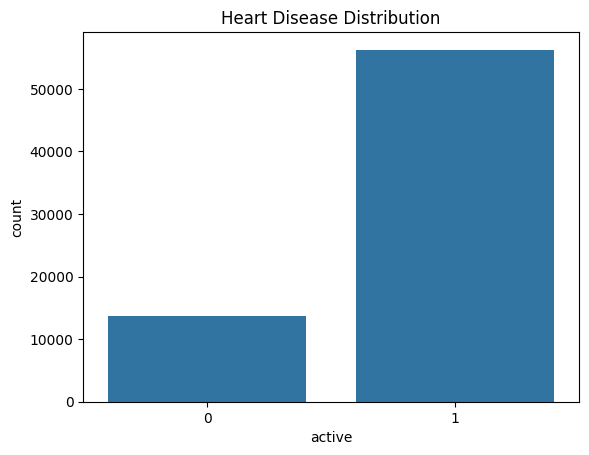

In [21]:
sns.countplot(x='active', data=df)
plt.title("Heart Disease Distribution")
plt.show()
# no heart diseases =0, diseases present = 1

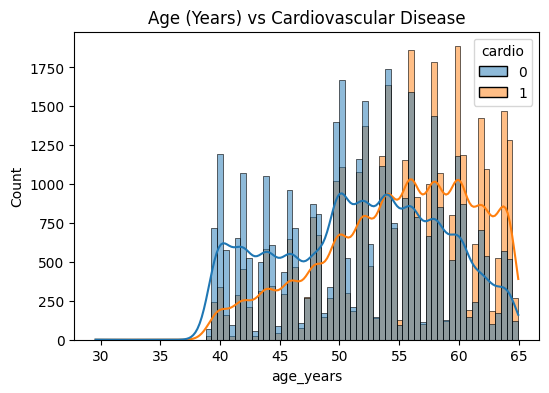

In [35]:
#Age vs Heart Disease
df['age_years'] = df['age'] / 365
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='age_years', hue='cardio', kde=True)
plt.title("Age (Years) vs Cardiovascular Disease")
plt.show()



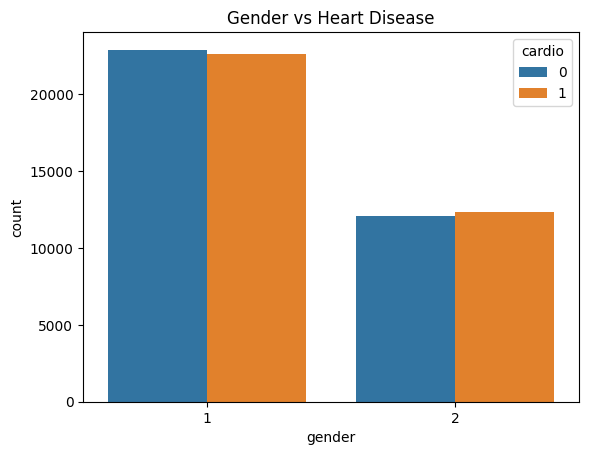

In [36]:
#gender vs heart diseases
sns.countplot(x='gender', hue='cardio', data=df)
plt.title("Gender vs Heart Disease")
plt.show()


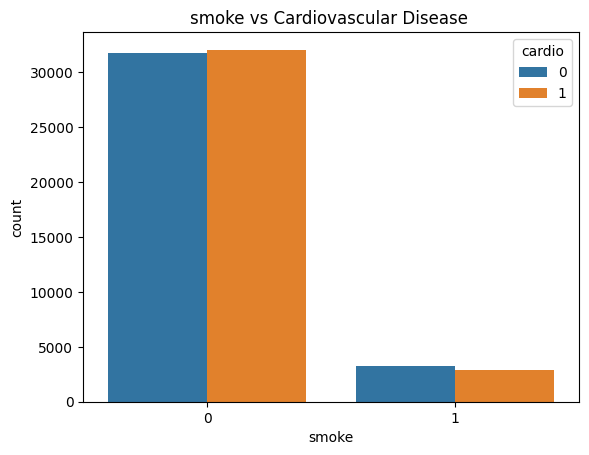

In [45]:
#smoke vs heart diseases
sns.countplot(x='smoke', hue='cardio', data=df)
plt.title("smoke vs Cardiovascular Disease ")
plt.show()


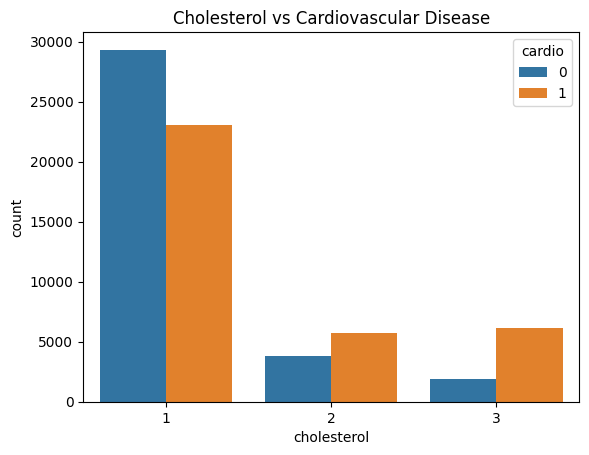

In [37]:
#cholestrol
sns.countplot(x='cholesterol', hue='cardio', data=df)
plt.title("Cholesterol vs Cardiovascular Disease")
plt.show()


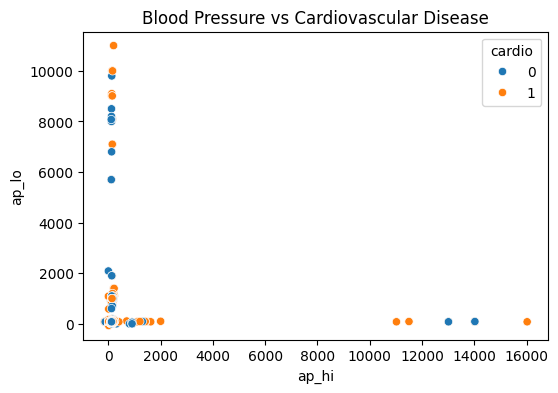

In [43]:
#Bp
plt.figure(figsize=(6,4))
sns.scatterplot(x='ap_hi', y='ap_lo', hue='cardio', data=df)
plt.title("Blood Pressure vs Cardiovascular Disease")
plt.show()


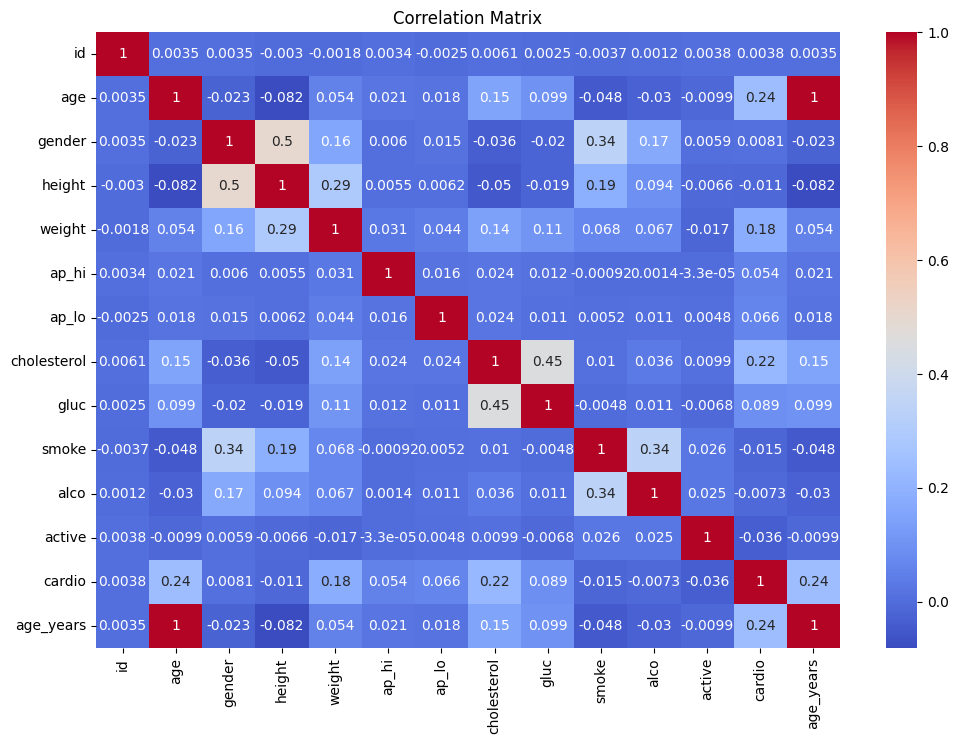

In [46]:
#coorelation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [47]:
#target seperation
X = df.drop('cardio', axis=1)
y = df['cardio']


In [49]:
#train - test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



In [50]:
#feature scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [51]:
#logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_acc)


Logistic Regression Accuracy: 0.7232857142857143


In [52]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_acc)

KNN Accuracy: 0.6250714285714286


In [54]:
#SVM
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_acc)

SVM Accuracy: 0.7294285714285714


In [55]:
#DECISION TREE
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_acc)


Decision Tree Accuracy: 0.6337857142857143


In [56]:
#random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.7271428571428571


In [57]:
#accuracy comparison
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy': [lr_acc, knn_acc, svm_acc, dt_acc, rf_acc]
})

accuracy_df


,Model,Accuracy
0,Logistic Regression,0.723286
1,KNN,0.625071
2,SVM,0.729429
3,Decision Tree,0.633786
4,Random Forest,0.727143


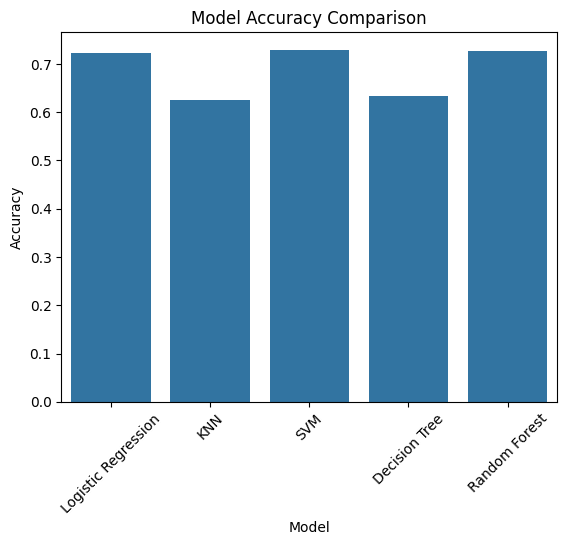

In [58]:
#accuracy bar plot
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.show()


In [62]:
from sklearn.svm import SVC

final_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
final_model.fit(X_train, y_train)


SVC(C=1, random_state=42)

In [65]:
y_pred = final_model.predict(X_test)
print("Final SVM Accuracy:", accuracy_score(y_test, y_pred))


Final SVM Accuracy: 0.7294285714285714


In [66]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))

print("\nClassification Report:")
print(classification_report(y_test, svm_pred))


Confusion Matrix:
[[5287 1701]
 [2087 4925]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.74      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [ ]:
#The final Support Vector Machine model achieved an accuracy of 73%.
#The confusion matrix and classification report indicate balanced performance across both classes.
#The model effectively predicts cardiovascular disease and demonstrates good generalization capability on unseen data.